In [3]:
import pandas as pd

In [4]:
df=pd.read_csv("spam.csv")

In [5]:
df.head()

,Unnamed: 0,spamORham,Message
0,0,ham,"Go until jurong point, crazy.. Available only ..."
1,1,ham,Ok lar... Joking wif u oni...
2,2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,3,ham,U dun say so early hor... U c already then say...
4,4,ham,"Nah I don't think he goes to usf, he lives aro..."


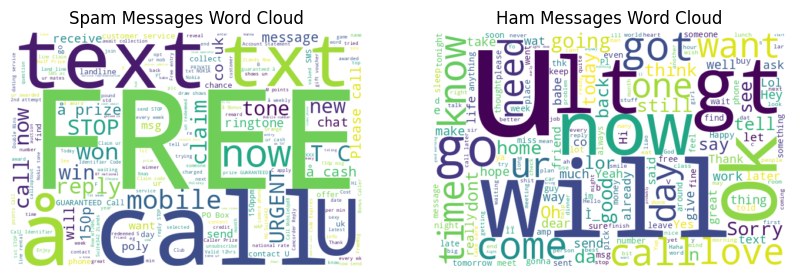

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

spam_words = ' '.join(df[df['spamORham'] == 'spam']['Message'])
ham_words = ' '.join(df[df['spamORham'] == 'ham']['Message'])

spam_wordcloud = WordCloud(width=600, height=400, background_color='white').generate(spam_words)
ham_wordcloud = WordCloud(width=600, height=400, background_color='white').generate(ham_words)

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Spam Messages Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.title('Ham Messages Word Cloud')
plt.axis('off')

plt.show()

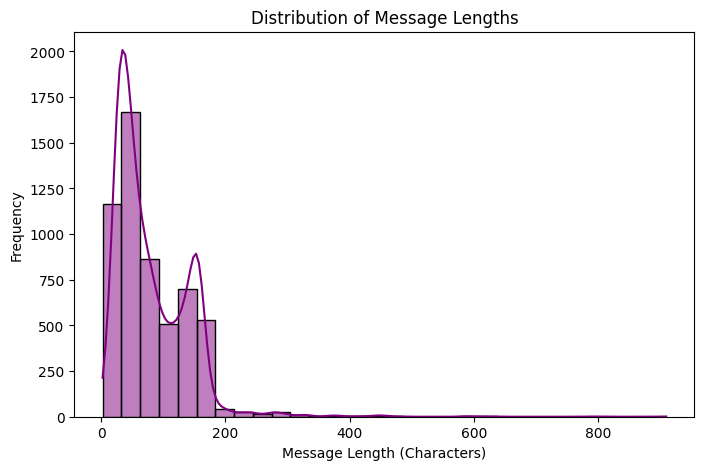

In [7]:
import seaborn as sns
df['message_length'] = df['Message'].apply(len)

plt.figure(figsize=(8, 5))
sns.histplot(df['message_length'], bins=30, kde=True, color='purple')
plt.title('Distribution of Message Lengths')
plt.xlabel('Message Length (Characters)')
plt.ylabel('Frequency')
plt.show()

In [8]:
df.head()

,Unnamed: 0,spamORham,Message,message_length
0,0,ham,"Go until jurong point, crazy.. Available only ...",111
1,1,ham,Ok lar... Joking wif u oni...,29
2,2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,3,ham,U dun say so early hor... U c already then say...,49
4,4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [9]:
df.drop(columns=["Unnamed: 0"], inplace=True)

In [10]:
df.head()

,spamORham,Message,message_length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [11]:
df["label"] = df["spamORham"].map({"spam":1,"ham":0})

In [12]:
df.drop(columns=["spamORham", "message_length"], inplace=True)

In [13]:
df

,Message,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,1
5568,Will Ì_ b going to esplanade fr home?,0
5569,"Pity, * was in mood for that. So...any other s...",0
5570,The guy did some bitching but I acted like i'd...,0


Cleaning Text

In [14]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

# Download NLTK data (only needed once)
nltk.download("punkt_tab")
nltk.download("stopwords")

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [15]:
# Initialize stemmer and stopwords
ps = PorterStemmer()
stop_words = set(stopwords.words("english"))

def clean_text(text):
    # Lowercase
    text = text.lower()
    # Remove non-alphabet characters
    text = re.sub(r'[^a-z]', ' ', text)
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords + apply stemming
    tokens = [ps.stem(word) for word in tokens if word not in stop_words]
    # Join back into string
    return " ".join(tokens)

# Apply cleaning
df["cleaned_message"] = df["Message"].apply(clean_text)

print(df.head())

                                             Message  label  \
0  Go until jurong point, crazy.. Available only ...      0   
1                      Ok lar... Joking wif u oni...      0   
2  Free entry in 2 a wkly comp to win FA Cup fina...      1   
3  U dun say so early hor... U c already then say...      0   
4  Nah I don't think he goes to usf, he lives aro...      0   

                                     cleaned_message  
0  go jurong point crazi avail bugi n great world...  
1                              ok lar joke wif u oni  
2  free entri wkli comp win fa cup final tkt st m...  
3                u dun say earli hor u c alreadi say  
4               nah think goe usf live around though  


In [16]:
df.head()

,Message,label,cleaned_message
0,"Go until jurong point, crazy.. Available only ...",0,go jurong point crazi avail bugi n great world...
1,Ok lar... Joking wif u oni...,0,ok lar joke wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,free entri wkli comp win fa cup final tkt st m...
3,U dun say so early hor... U c already then say...,0,u dun say earli hor u c alreadi say
4,"Nah I don't think he goes to usf, he lives aro...",0,nah think goe usf live around though


<Axes: xlabel='label'>

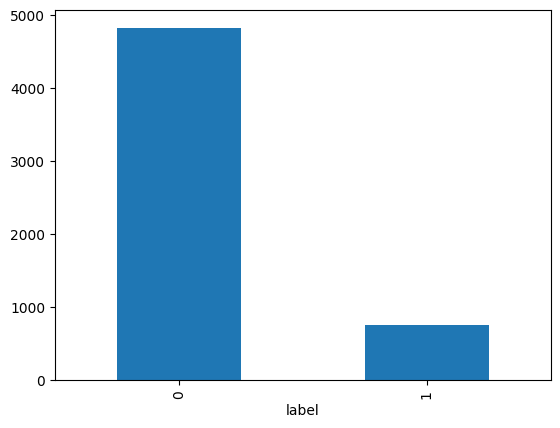

In [17]:
df["label"].value_counts().plot(kind="bar")

In [18]:
#BALANCING DATA

In [19]:
from imblearn.under_sampling import RandomUnderSampler

#so we first assign our features and target

X = df.drop("label", axis = 1)  #features
y = df["label"]  #target

#saamppling technique

oversampler = RandomUnderSampler()

X_res, y_res = oversampler.fit_resample(X, y)

#creating the new dataset for new dataframe

df_balanced = pd.DataFrame(X_res, columns = X.columns)
df_balanced["label"] = y_res
df_balanced["label"].value_counts()

,count
label,
0,747
1,747


### **Train Test  Split and Vectorization** (TFIDF)

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [21]:
#train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_balanced["cleaned_message"], df_balanced["label"], test_size=0.2, random_state=42)

In [22]:
from imblearn.under_sampling import RandomUnderSampler

#so we first assign our features and target

X = df.drop("label", axis = 1)  #features
y = df["label"]  #target

#saamppling technique

oversampler = RandomUnderSampler()

X_res, y_res = oversampler.fit_resample(X, y)

#creating the new dataset for new dataframe

df_balanced = pd.DataFrame(X_res, columns = X.columns)
df_balanced["label"] = y_res
df_balanced["label"].value_counts()

,count
label,
0,747
1,747


In [23]:
from imblearn.under_sampling import RandomUnderSampler

#so we first assign our features and target

X = df.drop("label", axis = 1)  #features
y = df["label"]  #target

#saamppling technique

oversampler = RandomUnderSampler()

X_res, y_res = oversampler.fit_resample(X, y)

#creating the new dataset for new dataframe

df_balanced = pd.DataFrame(X_res, columns = X.columns)
df_balanced["label"] = y_res
df_balanced["label"].value_counts()

,count
label,
0,747
1,747


In [24]:
#TF-IDF VECTORIZATION

Tfidf_Vectorizer = TfidfVectorizer()
X_train_tfidf = Tfidf_Vectorizer.fit_transform(X_train)
X_test_tfidf = Tfidf_Vectorizer.transform(X_test)

In [25]:
X_train_tfidf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## **Model Building and ensemble learning**

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define base models
log_reg = LogisticRegression(max_iter=1000, random_state=42)
rf = RandomForestClassifier(n_estimators=200, random_state=42)
gb = GradientBoostingClassifier(n_estimators=200, random_state=42)

# Ensemble using VotingClassifier
ensemble = VotingClassifier(
    estimators=[('lr', log_reg), ('rf', rf), ('gb', gb)],
    voting='soft'   # 'hard' = majority voting, 'soft' = probability-based voting
)

# Train models
ensemble.fit(X_train_tfidf, y_train)

# Predictions
y_pred = ensemble.predict(X_test_tfidf)

# Evaluation
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[142   3]
 [ 17 137]]
Accuracy: 0.9331103678929766

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.98      0.93       145
           1       0.98      0.89      0.93       154

    accuracy                           0.93       299
   macro avg       0.94      0.93      0.93       299
weighted avg       0.94      0.93      0.93       299



In [27]:
#Logistic Regression

# Initialize Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Train model
log_reg.fit(X_train_tfidf, y_train)

# Predictions
y_pred = log_reg.predict(X_test_tfidf)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9531772575250836

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.95       145
           1       0.99      0.92      0.95       154

    accuracy                           0.95       299
   macro avg       0.96      0.95      0.95       299
weighted avg       0.96      0.95      0.95       299


Confusion Matrix:
 [[144   1]
 [ 13 141]]


In [28]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize SVM classifier
svm_clf = SVC(kernel='linear', probability=True, random_state=42)

# Train model
svm_clf.fit(X_train_tfidf, y_train)

# Predictions
y_pred = svm_clf.predict(X_test_tfidf)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9698996655518395

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       145
           1       1.00      0.94      0.97       154

    accuracy                           0.97       299
   macro avg       0.97      0.97      0.97       299
weighted avg       0.97      0.97      0.97       299


Confusion Matrix:
 [[145   0]
 [  9 145]]


In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize Random Forest
rf_clf = RandomForestClassifier(n_estimators=200, random_state=42)

# Train model
rf_clf.fit(X_train_tfidf, y_train)

# Predictions
y_pred = rf_clf.predict(X_test_tfidf)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9531772575250836

Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95       145
           1       1.00      0.91      0.95       154

    accuracy                           0.95       299
   macro avg       0.96      0.95      0.95       299
weighted avg       0.96      0.95      0.95       299


Confusion Matrix:
 [[145   0]
 [ 14 140]]


## **Dectection System**

In [30]:
def predict_fake_or_real(text):
  cleaned_text = clean_text(text)
  vectorized_text = Tfidf_Vectorizer.transform([cleaned_text])
  result = rf_clf.predict(vectorized_text)
  return result

In [34]:
#Exmaple
input_text = "You have been selected for a $500 Walmart gift card. Reply WIN to claim."

prediction = predict_fake_or_real(input_text)
print(prediction)

if prediction == 0:
  print("Real Message")
else:
  print("Fake Message")

[1]
Fake Message


In [36]:
#Exmaple
input_text = "Hello, you win a lottery"

prediction = predict_fake_or_real(input_text)
print(prediction)

if prediction == 0:
  print("Real Message")
else:
  print("Fake Message")

[0]
Real Message


### **Saving the File**

In [32]:
import pickle
pickle.dump(rf_clf, open("spam_detection_model.pkl", "wb"))
pickle.dump(Tfidf_Vectorizer, open("tfidf_vectorizer.pkl", "wb"))
import pickle

#loading the random forest model
with open ("spam_detection_model.pkl", "rb") as file:
  rf_clf = pickle.load(file)

#loading the tfidf vectorizer
with open ("tfidf_vectorizer.pkl", "rb") as file:
  Tfidf_Vectorizer = pickle.load(file)
